<left>FINM 36702 - Portfolio Credit Risk: Modeling and Estimation</left>
<left>Spring 2023</left>
<br>
<h1><center> Assignment 3 </center></h1>
<center>Due - 18:00 [CST] April 13th, 2023</center>
<br>
<h3>Ki Hyun</h3>
<h3>Student ID: 12125881</h3>

### Imports

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import brentq
from functools import partial
from scipy.integrate import quad
import warnings

In [3]:
warnings.filterwarnings("ignore")

# Question 1.

In [4]:
def dr_pdf(x):
    return 2 - 2*x

In [5]:
def lgd_pdf(x):
    return 4*x - 4*x**3

In [6]:
grid = np.arange(start = 0, stop = 1, step = 0.001)
drs = np.vectorize(dr_pdf)(grid)
lgds = np.vectorize(lgd_pdf)(grid)

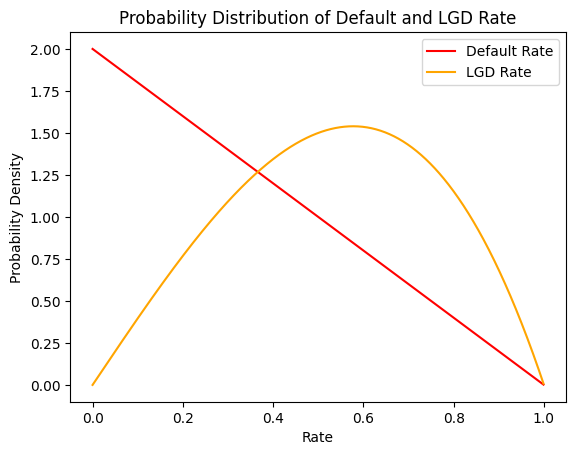

In [7]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data for default rate
ax.plot(grid, drs, color='red', label='Default Rate')

# Plot the data for LGD rate
ax.plot(grid, lgds, color='orange', label='LGD Rate')

# Add labels and title
ax.set_ylabel('Probability Density')
ax.set_xlabel('Rate')
ax.set_title('Probability Distribution of Default and LGD Rate')
ax.legend()

# Show the plot
plt.show()
None

# Question 2.

In [8]:
def loss_pdf(x):
    if x == 0.0:
        return np.inf
    else:
        return 4/3 * x**(-1/3) - 4/3 * x**(1/3)

In [9]:
losses = np.vectorize(loss_pdf)(grid)

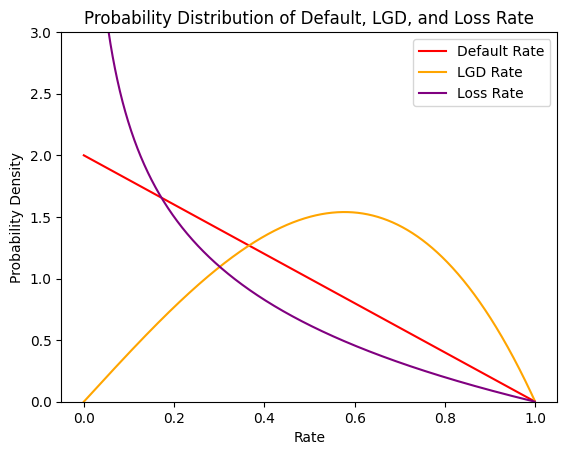

In [10]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data for default rate
ax.plot(grid, drs, color='red', label='Default Rate')

# Plot the data for LGD rate
ax.plot(grid, lgds, color='orange', label='LGD Rate')

# Plot the data for LGD rate
ax.plot(grid, losses, color='purple', label='Loss Rate')

# Add labels and title
ax.set_ylabel('Probability Density')
ax.set_xlabel('Rate')
ax.set_title('Probability Distribution of Default, LGD, and Loss Rate')
ax.legend()

# Set the limits of the vertical axis to range from 0 to 3
ax.set_ylim(0, 3)

# Show the plot
plt.show()
None

# Question 3.

In [11]:
def Vasicek_pdf(x, p, rho):
    return np.sqrt((1 - rho)/rho) * np.exp(-(np.sqrt(1 - rho)*norm.ppf(x) - norm.ppf(p))**2 /(2 * rho) +
                                           (norm.ppf(x))**2 /2)

In [12]:
def Vasicek_sd(rho, p):
    def f(x):
        return (x - p)**2 * Vasicek_pdf(x, p, rho)

    result, error = quad(f, 0, 1)

    return np.sqrt(result)

In [14]:
rhos = np.arange(start = 0.05, stop = 0.95, step = 0.001)
partial_Vasicek_sd = partial(Vasicek_sd, p = 0.1)
sds = np.vectorize(partial_Vasicek_sd)(rhos[1:-1])

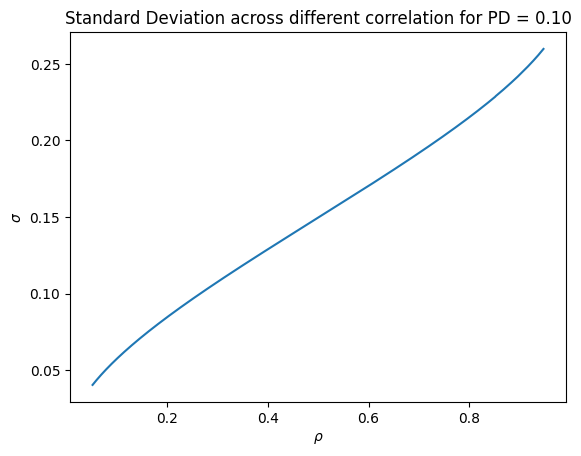

In [23]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data for default rate
ax.plot(rhos[1:-1], sds)

# Add labels and title
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$\sigma$')
ax.set_title('Standard Deviation across different correlation for PD = 0.10')

# Show the plot
plt.show()
None

In [16]:
x = np.arange(start = 0, stop = 1, step = 0.001)
# pd = 0.1, rho = 0.05
partial_Vasicek_pdf1 = partial(Vasicek_pdf, p = 0.1, rho = 0.05)
pdfs1 = np.vectorize(partial_Vasicek_pdf1)(x)
# pd = 0.1, rho = 0.95
partial_Vasicek_pdf2 = partial(Vasicek_pdf, p = 0.1, rho = 0.95)
pdfs2 = np.vectorize(partial_Vasicek_pdf2)(x)

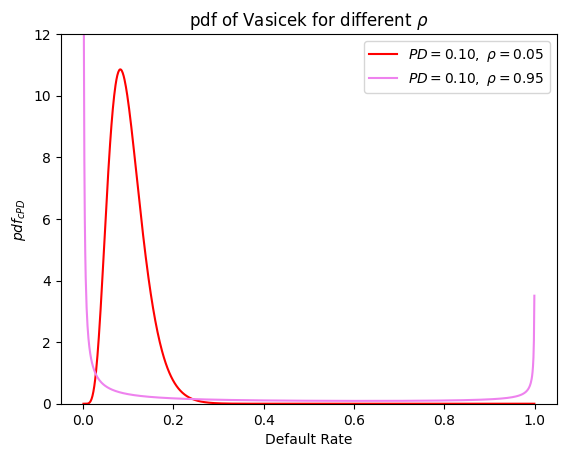

In [24]:
# Create a figure with two axes side by side
fig, ax = plt.subplots()

# Plot the first data
ax.plot(x, pdfs1, color = "red", label = r'$PD = 0.10, \ \rho = 0.05$')

# Plot the second data
ax.plot(x, pdfs2, color = "violet", label = r'$PD = 0.10, \ \rho = 0.95$')

# Add lables and Title:
ax.set_ylabel(r'$pdf_{cPD}$')
ax.set_xlabel('Default Rate')
ax.set_title(r'pdf of Vasicek for different $\rho$')
ax.legend()

# Set the limits of the vertical axis to range from 0 to 0.12
ax.set_ylim(0, 12)

# Adjust the layout and display the figure
plt.show()
None

# Question 4.

In [18]:
def Vasicek_inv_cdf(x, p, rho):
    return norm.cdf(np.sqrt(rho/(1-rho)) * norm.ppf(x) + norm.ppf(p)/np.sqrt(1 - rho))

In [19]:
# PD = 0.06, rho = 0.06
partial_Vasicek_inv1 = partial(Vasicek_inv_cdf, p = 0.06, rho = 0.06)
inv_cdf1 = np.vectorize(partial_Vasicek_inv1)(x)
# PD = 0.03, rho = 0.2
partial_Vasicek_inv2 = partial(Vasicek_inv_cdf, p = 0.03, rho = 0.2)
inv_cdf2 = np.vectorize(partial_Vasicek_inv2)(x)

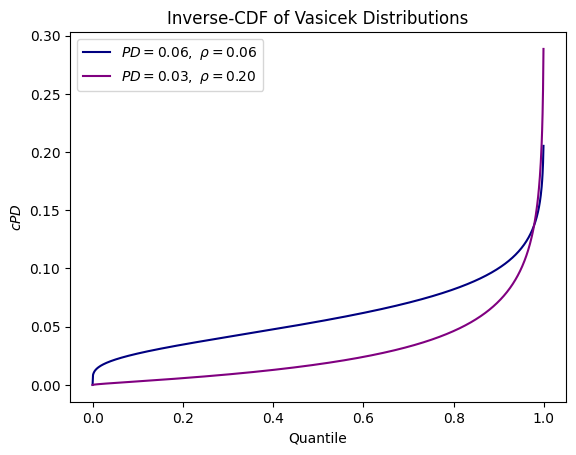

In [25]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data for default rate
ax.plot(x, inv_cdf1, color='navy', label=r'$PD = 0.06, \ \rho = 0.06$')

# Plot the data for LGD rate
ax.plot(x, inv_cdf2, color='purple', label=r'$PD = 0.03, \ \rho = 0.20$')

# Add labels and title
ax.set_ylabel(r'$cPD$')
ax.set_xlabel('Quantile')
ax.set_title('Inverse-CDF of Vasicek Distributions')
ax.legend()

# Show the plot
plt.show()
None

In [21]:
def f2(x):
    if x == 0.0:
        return np.inf
    else:
        return partial_Vasicek_inv1(x) - partial_Vasicek_inv2(x)

In [22]:
quantile_star = brentq(f2, a = 0, b = 1 - 1e-10)
print("The quantile at which both loans have the same value of cPD:", quantile_star)

The quantile at which both loans have the same value of cPD: 0.9782050922916516
